# BibRec: Training Random Forest Model

### RF Features: Country, State, Age, Year-of-Publication, Publisher

In [64]:
from bibrec.server.data_exploration import get_normalized_data, hot_encode_country
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

books, users, ratings = get_normalized_data(books_path='data/BX-Books.csv', users_path='data/BX-Users.csv', ratings_path='data/BX-Book-Ratings.csv')


/Dev/repos/FH-SBG/MMT1/RES/recommender-systems/wt-rf/bibrec/server/data_exploration.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv(path, sep=";", encoding="latin-1")


With NaN values 34.862889904962536
used mean values 34.85611905711678


/Dev/repos/FH-SBG/MMT1/RES/recommender-systems/wt-rf/bibrec/server/data_exploration.py:37: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  location_seperated = users.location.str.split(',', 2, expand=True)


In [65]:
# limit data volume
df_ratings = ratings.groupby('isbn13').user_id.count().sort_values(ascending=False)
df_ratings = ratings[:1000]
df_ratings = df_ratings.reset_index()


In [66]:
# RF Features: Country, State, Age, Year-of-Publication, Publisher
tmp_users = users.filter(regex="user_id|age|country_|state_", axis=1)
tmp_books = books.filter(regex="isbn13|normalized_year_of_publication|publisher_", axis=1)
# df = df_ratings.filter(regex="isbn13|user_id|normalized_rating", axis=1)
df = df_ratings.filter(regex="isbn13|user_id|book_rating", axis=1)
df = df.merge(tmp_users)
df = df.merge(tmp_books)


In [67]:
df_ratings

,index,user_id,isbn,book_rating,isbn13,age,city,state,country,user_mean,user_count,normalized_rating
0,0,276726,0155061224,5,9780155061224,38.728034,seattle,washington,usa,5.0,1.0,0.0
1,1,276729,052165615X,3,9780521656153,16.000000,rijeka,n/a,croatia,4.5,2.0,-1.5
2,2,276729,0521795028,6,9780521795029,16.000000,rijeka,n/a,croatia,4.5,2.0,1.5
3,3,276744,038550120X,7,9780385501200,55.091701,torrance,california,usa,7.0,1.0,0.0
4,4,276747,0060517794,9,9780060517793,25.000000,iowa city,iowa,usa,8.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,277774,0451524462,7,9780451524461,17.000000,plaquemine,louisiana,usa,7.0,1.0,0.0
996,996,277776,0345339681,7,9780345339683,17.000000,baton rouge,louisiana,usa,7.0,1.0,0.0
997,997,277778,0061097314,8,9780061097317,17.000000,baton rouge,louisiana,usa,8.0,1.0,0.0
998,998,277782,0425173739,7,9780425173732,17.000000,baton rouge,louisiana,usa,7.0,1.0,0.0


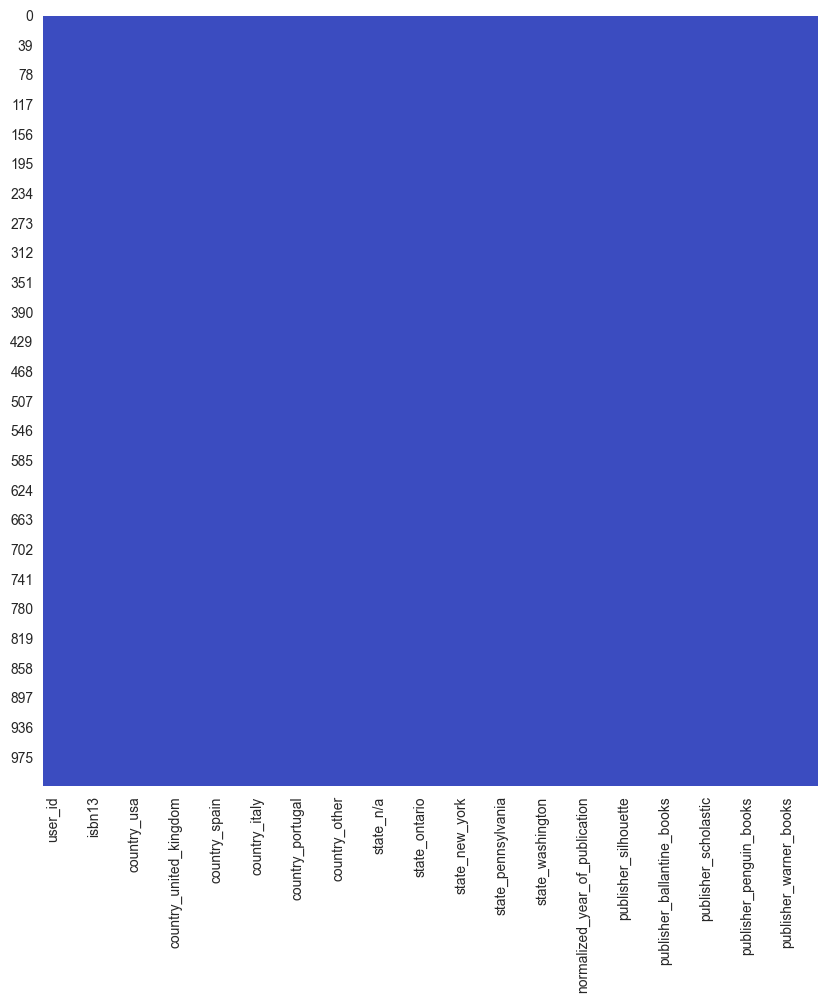

In [68]:
# show the plot
heatmap = sns.heatmap(df.isnull(), cbar=False, cmap='coolwarm')
plt.gcf().set_size_inches(10, 10)
plt.show()


In [69]:
# Features
X = df.drop(['user_id', 'isbn13', 'book_rating'], axis=1)
# Prediction
Y = df['book_rating']


In [70]:
X


,age,country_usa,country_canada,country_united_kingdom,country_germany,country_spain,country_australia,country_italy,country_france,country_portugal,...,publisher_silhouette,publisher_pocket,publisher_ballantine_books,publisher_bantam_books,publisher_scholastic,publisher_simon_&amp;_schuster,publisher_penguin_books,publisher_berkley_publishing_group,publisher_warner_books,publisher_other
0,38.728034,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,16.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,16.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,55.091701,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,25.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,45.936121,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1008,17.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1009,17.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1010,17.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [71]:
Y

0       5
1       3
2       6
3       7
4       9
       ..
1007    7
1008    7
1009    8
1010    7
1011    8
Name: book_rating, Length: 1012, dtype: int64

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=7)


In [73]:
rfc = RandomForestClassifier(n_estimators=100, min_weight_fraction_leaf=0, n_jobs=3, random_state=1)


In [74]:
rfc.fit(X_train, y_train)


RandomForestClassifier(min_weight_fraction_leaf=0, n_jobs=3, random_state=1)

In [75]:
import pickle

# Save the model to a file
with open("random_forest_classifier5.pkl", "wb") as file:
    pickle.dump(rfc, file)

In [76]:
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test, rfc_pred))
print(accuracy_score(y_test, rfc_pred) * 100)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         6
           5       0.17      0.17      0.17        29
           6       0.19      0.10      0.13        31
           7       0.21      0.16      0.18        56
           8       0.31      0.36      0.34        77
           9       0.31      0.29      0.30        42
          10       0.33      0.45      0.38        58

    accuracy                           0.27       304
   macro avg       0.15      0.15      0.15       304
weighted avg       0.26      0.27      0.26       304

27.302631578947366


/home/fab/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fab/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fab/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix, without normalization
[[ 0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  1  0  0  1  1  0  0]
 [ 0  0  0  0  0  0  3  1  1  1]
 [ 0  1  1  1  5  1  2  9  5  4]
 [ 0  0  0  0  4  3  8  6  3  7]
 [ 0  0  0  1  7  4  9 16  6 13]
 [ 0  1  0  2  3  6 12 28  7 18]
 [ 0  0  0  1  3  1  1 15 12  9]
 [ 0  0  0  1  7  1  6 12  5 26]]
Normalized confusion matrix
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.33 0.   0.   0.33 0.33 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.5  0.17 0.17 0.17]
 [0.   0.03 0.03 0.03 0.17 0.03 0.07 0.31 0.17 0.14]
 [0.   0.   0.   0.   0.13 0.1  0.26 0.19 0.1  0.23]
 [0.   0.   0.   0.02 0.12 0.07 0.16 0.29 0.11 0.23]
 [0.   0.01 0.   0.03 0.04 0.08 0.16 0.36 0.09 0.23]
 [0.   0.   0.   0.02 0.07 0.02 0.02 0.36 0.29 0.21]
 [0.   0.   0.   0.02 0.12 0.02 0.1  0.21 0.09 0.45]]


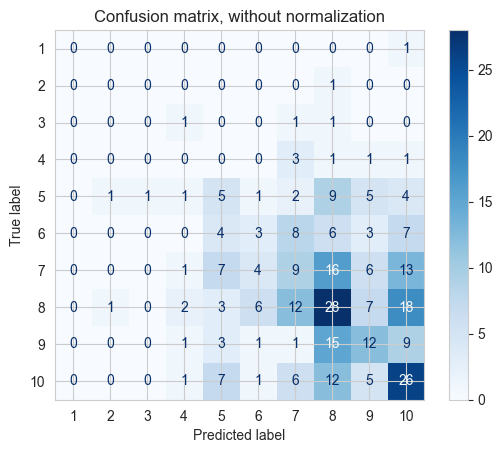

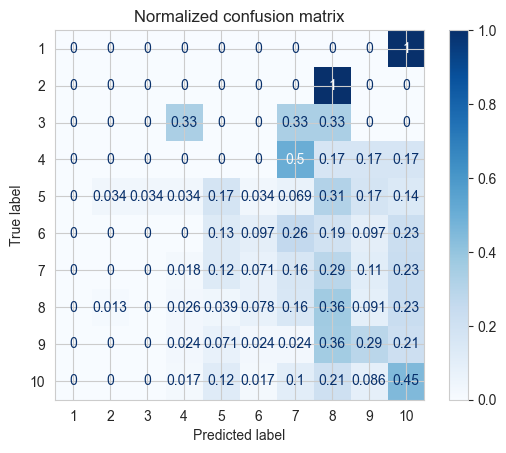

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

classifier = rfc

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        # display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [78]:
rfc.score(X_train, y_train)

0.751412429378531

In [79]:
feature_importance = pd.DataFrame({'Feature_names': X.columns, 'Importances': rfc.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importances', ascending=False)
feature_importance

,Feature_names,Importances
0,age,0.670706
23,normalized_year_of_publication,0.329294
26,publisher_pocket,0.000000
20,state_illinois,0.000000
21,state_washington,0.000000
22,state_other,0.000000
24,publisher_harlequin,0.000000
25,publisher_silhouette,0.000000
27,publisher_ballantine_books,0.000000
18,state_florida,0.000000


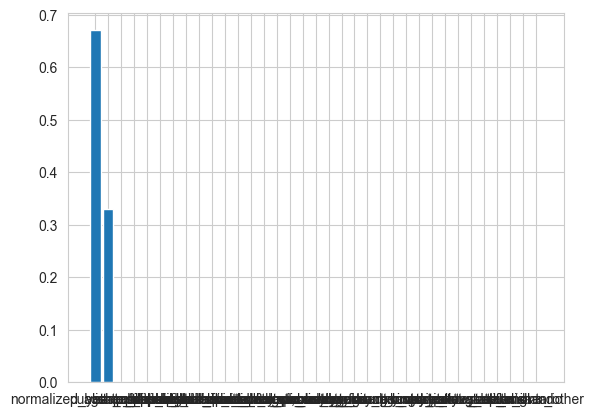

In [80]:
plt.bar(feature_importance['Feature_names'], feature_importance['Importances'])
plt.show()